Mercancías completo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
mercancias_nav = pd.read_excel('data/Mercancias-Paises_Origen-Destino.xlsx','DATOS')

mercancias_nav

,Año,Autoridad Portuaria,País,Área Mundial,Embarcadas,Desembarcadas,TOTAL
0,1962,A Coruña,Alemania,Unión Europea,97708.0,472.0,98180.0
1,1962,A Coruña,Angola,Sur de África,0.0,0.0,0.0
2,1962,A Coruña,Arabia Saudí,Oriente Medio,0.0,0.0,0.0
3,1962,A Coruña,Argelia,Norte de África,0.0,0.0,0.0
4,1962,A Coruña,Argentina,América del Sur,7.0,0.0,7.0
...,...,...,...,...,...,...,...
131207,2023,Vilagarcía,Suecia,Unión Europea,0.0,24647.0,24647.0
131208,2023,Vilagarcía,Tailandia,Resto de Asia,0.0,2591.0,2591.0
131209,2023,Vilagarcía,Trinidad y Tobago,América Central,0.0,3996.0,3996.0
131210,2023,Vilagarcía,Turquía,Resto Europa Occidental,0.0,2159.0,2159.0


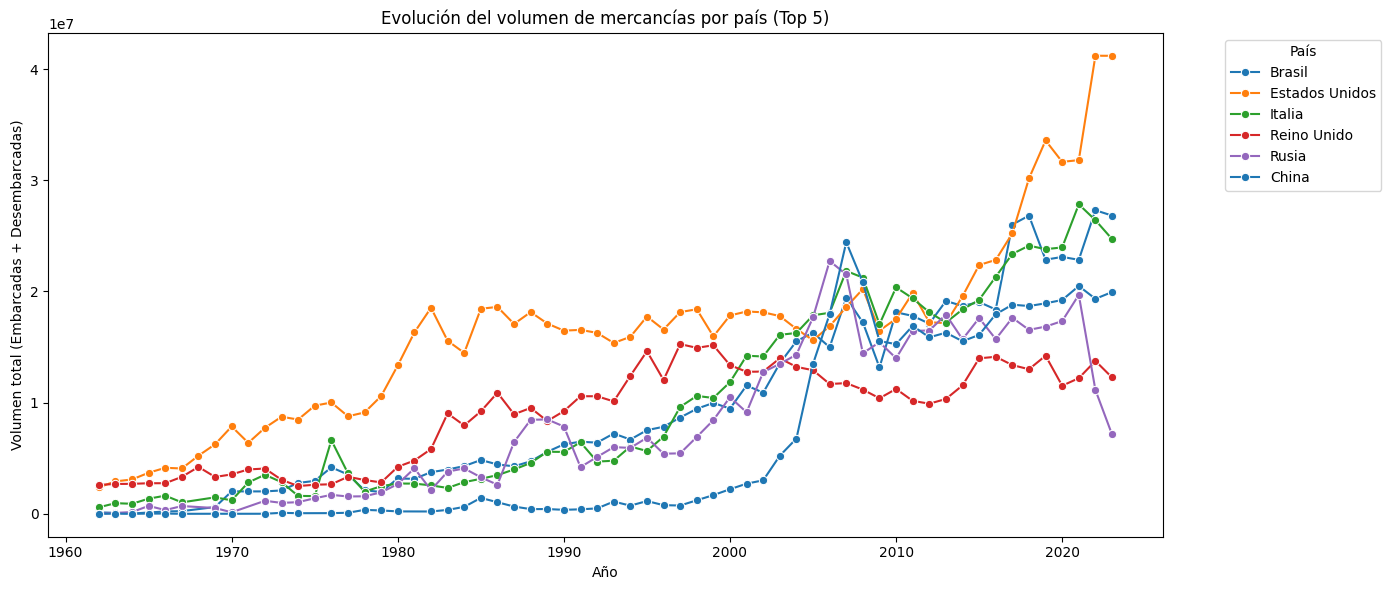

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener bien los tipos
mercancias_nav['Año'] = pd.to_numeric(mercancias_nav['Año'], errors='coerce')
mercancias_nav['Embarcadas'] = pd.to_numeric(mercancias_nav['Embarcadas'], errors='coerce')
mercancias_nav['Desembarcadas'] = pd.to_numeric(mercancias_nav['Desembarcadas'], errors='coerce')

# Crear columna de total
mercancias_nav['Total'] = mercancias_nav['Embarcadas'] + mercancias_nav['Desembarcadas']

mercancias_nav = mercancias_nav[mercancias_nav['País'] != 'España']

# Agrupar por Año y País
agrupado = mercancias_nav.groupby(['Año', 'País'])['Total'].sum().reset_index()

# Obtener los 5 países con mayor volumen total acumulado
top_paises = agrupado.groupby('País')['Total'].sum().nlargest(5).index
china = agrupado[agrupado['País'] == 'China']
# Filtrar el DataFrame con .copy() para evitar el warning
agrupado_top = agrupado[agrupado['País'].isin(top_paises)].copy()

# 📊 Graficar evolución
plt.figure(figsize=(14, 6))
sns.lineplot(data=agrupado_top, x='Año', y='Total', hue='País', marker='o')
sns.lineplot(data=china, x='Año', y='Total', hue='País', marker='o')
plt.title('Evolución del volumen de mercancías por país (Top 5)')
plt.ylabel('Volumen total (Embarcadas + Desembarcadas)')
plt.xlabel('Año')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [47]:
# Asegúrate de que 'Año' y 'País' estén bien
mercancias_nav['Año'] = pd.to_numeric(mercancias_nav['Año'], errors='coerce')
mercancias_nav['País'] = mercancias_nav['País'].str.strip()  # por si hay espacios

# Crear columna de volumen total si aún no la tienes
mercancias_nav['Total'] = mercancias_nav['Embarcadas'] + mercancias_nav['Desembarcadas']

# Lista de países a incluir (ajusta según cómo aparezcan en tu DataFrame)
paises_objetivo = ['Estados Unidos', 'Rusia', 'China']

# Filtrado
mercancias_nav_filtrado = mercancias_nav[
    (mercancias_nav['País'].isin(paises_objetivo)) &
    (mercancias_nav['Año'] >= 2000)
].copy()

C:\Users\Francisco\AppData\Local\Temp\ipykernel_17800\2949023316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercancias_nav['Año'] = pd.to_numeric(mercancias_nav['Año'], errors='coerce')
C:\Users\Francisco\AppData\Local\Temp\ipykernel_17800\2949023316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercancias_nav['País'] = mercancias_nav['País'].str.strip()  # por si hay espacios
C:\Users\Francisco\AppData\Local\Temp\ipykernel_17800\2949023316.py:6: SettingWithCopyWarning: 
A value is trying to 

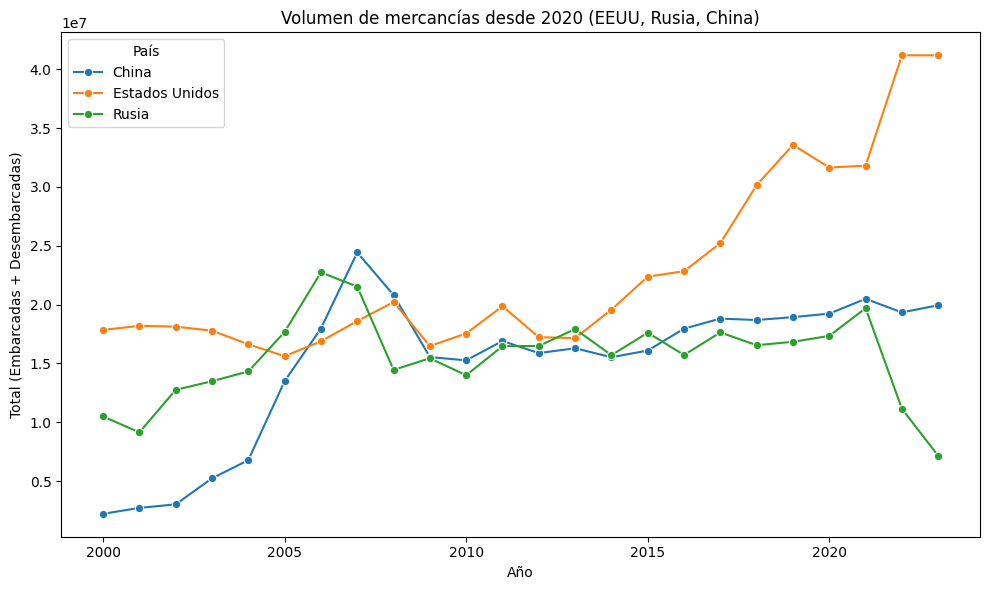

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar para la gráfica
agrupado = mercancias_nav_filtrado.groupby(['Año', 'País'])['Total'].sum().reset_index()

# Graficar
plt.figure(figsize=(10, 6))
sns.lineplot(data=agrupado, x='Año', y='Total', hue='País', marker='o')
plt.title('Volumen de mercancías desde 2020 (EEUU, Rusia, China)')
plt.ylabel('Total (Embarcadas + Desembarcadas)')
plt.xlabel('Año')
plt.tight_layout()
plt.show()

In [3]:
china_total = mercancias_nav[mercancias_nav['País'] == 'China']

china_total

,Año,Autoridad Portuaria,País,Área Mundial,Embarcadas,Desembarcadas,TOTAL
11,1962,A Coruña,China,Resto de Asia,0.0,0.0,0.0
78,1962,Alicante,China,Resto de Asia,0.0,0.0,0.0
145,1962,Almería,China,Resto de Asia,0.0,0.0,0.0
212,1962,Avilés,China,Resto de Asia,0.0,0.0,0.0
279,1962,Bahía de Algeciras,China,Resto de Asia,0.0,0.0,0.0
...,...,...,...,...,...,...,...
130656,2023,Santander,China,Resto de Asia,83.0,30399.0,30482.0
130727,2023,Sevilla,China,Resto de Asia,0.0,1865.0,1865.0
130779,2023,Tarragona,China,Resto de Asia,215.0,74179.0,74394.0
130884,2023,Valencia,China,Resto de Asia,1456079.0,4765075.0,6221154.0


In [4]:
mercancias_nav = mercancias_nav[['Año', 'Autoridad Portuaria', 'País', 'Área Mundial', 'Embarcadas', 'Desembarcadas']]
mercancias_nav


,Año,Autoridad Portuaria,País,Área Mundial,Embarcadas,Desembarcadas
0,1962,A Coruña,Alemania,Unión Europea,97708.0,472.0
1,1962,A Coruña,Angola,Sur de África,0.0,0.0
2,1962,A Coruña,Arabia Saudí,Oriente Medio,0.0,0.0
3,1962,A Coruña,Argelia,Norte de África,0.0,0.0
4,1962,A Coruña,Argentina,América del Sur,7.0,0.0
...,...,...,...,...,...,...
131207,2023,Vilagarcía,Suecia,Unión Europea,0.0,24647.0
131208,2023,Vilagarcía,Tailandia,Resto de Asia,0.0,2591.0
131209,2023,Vilagarcía,Trinidad y Tobago,América Central,0.0,3996.0
131210,2023,Vilagarcía,Turquía,Resto Europa Occidental,0.0,2159.0


In [5]:
mercancias_nav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131212 entries, 0 to 131211
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Año                  131212 non-null  int64  
 1   Autoridad Portuaria  131212 non-null  object 
 2   País                 131212 non-null  object 
 3   Área Mundial         131212 non-null  object 
 4   Embarcadas           131212 non-null  float64
 5   Desembarcadas        131212 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [6]:
from datetime import datetime

In [7]:
mercancias_nav['Año'] = pd.to_numeric(mercancias_nav['Año'], errors='coerce').astype('Int64')

C:\Users\Francisco\AppData\Local\Temp\ipykernel_17800\1814430159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercancias_nav['Año'] = pd.to_numeric(mercancias_nav['Año'], errors='coerce').astype('Int64')


In [8]:
mercancias_nav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131212 entries, 0 to 131211
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Año                  131212 non-null  Int64  
 1   Autoridad Portuaria  131212 non-null  object 
 2   País                 131212 non-null  object 
 3   Área Mundial         131212 non-null  object 
 4   Embarcadas           131212 non-null  float64
 5   Desembarcadas        131212 non-null  float64
dtypes: Int64(1), float64(2), object(3)
memory usage: 6.1+ MB


In [9]:
mercancias_nav['Año']= pd.to_datetime(mercancias_nav['Año'],format='%Y').dt.year

mercancias_nav

C:\Users\Francisco\AppData\Local\Temp\ipykernel_17800\2400371298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercancias_nav['Año']= pd.to_datetime(mercancias_nav['Año'],format='%Y').dt.year


,Año,Autoridad Portuaria,País,Área Mundial,Embarcadas,Desembarcadas
0,1962,A Coruña,Alemania,Unión Europea,97708.0,472.0
1,1962,A Coruña,Angola,Sur de África,0.0,0.0
2,1962,A Coruña,Arabia Saudí,Oriente Medio,0.0,0.0
3,1962,A Coruña,Argelia,Norte de África,0.0,0.0
4,1962,A Coruña,Argentina,América del Sur,7.0,0.0
...,...,...,...,...,...,...
131207,2023,Vilagarcía,Suecia,Unión Europea,0.0,24647.0
131208,2023,Vilagarcía,Tailandia,Resto de Asia,0.0,2591.0
131209,2023,Vilagarcía,Trinidad y Tobago,América Central,0.0,3996.0
131210,2023,Vilagarcía,Turquía,Resto Europa Occidental,0.0,2159.0


In [10]:
mercancias_nav

,Año,Autoridad Portuaria,País,Área Mundial,Embarcadas,Desembarcadas
0,1962,A Coruña,Alemania,Unión Europea,97708.0,472.0
1,1962,A Coruña,Angola,Sur de África,0.0,0.0
2,1962,A Coruña,Arabia Saudí,Oriente Medio,0.0,0.0
3,1962,A Coruña,Argelia,Norte de África,0.0,0.0
4,1962,A Coruña,Argentina,América del Sur,7.0,0.0
...,...,...,...,...,...,...
131207,2023,Vilagarcía,Suecia,Unión Europea,0.0,24647.0
131208,2023,Vilagarcía,Tailandia,Resto de Asia,0.0,2591.0
131209,2023,Vilagarcía,Trinidad y Tobago,América Central,0.0,3996.0
131210,2023,Vilagarcía,Turquía,Resto Europa Occidental,0.0,2159.0


In [11]:
mercancias_nav_imp = mercancias_nav[(mercancias_nav['Desembarcadas']>200)&(mercancias_nav['Embarcadas']>200)]

mercancias_nav_imp

,Año,Autoridad Portuaria,País,Área Mundial,Embarcadas,Desembarcadas
0,1962,A Coruña,Alemania,Unión Europea,97708.0,472.0
6,1962,A Coruña,Bélgica,Unión Europea,12956.0,5244.0
7,1962,A Coruña,Brasil,América del Sur,459.0,2153.0
19,1962,A Coruña,Estados Unidos,América del Norte,247.0,57051.0
22,1962,A Coruña,Francia,Unión Europea,315.0,21300.0
...,...,...,...,...,...,...
131196,2023,Vilagarcía,Marruecos,Norte de África,2629.0,4030.0
131197,2023,Vilagarcía,Mauritania,Norte de África,1159.0,1627.0
131202,2023,Vilagarcía,Portugal,Unión Europea,551.0,20159.0
131203,2023,Vilagarcía,Reino Unido,Resto Europa Occidental,81628.0,20261.0


In [12]:
mercancias_nav_imp.set_index('Año')

mercancias_nav_ue = mercancias_nav_imp[mercancias_nav_imp['Área Mundial']== 'Unión Europea']

mercancias_nav_ue = mercancias_nav_ue.loc[:, ('Año', 'Autoridad Portuaria', 'País', 'Embarcadas', 'Desembarcadas')]

mercancias_nav_ue

,Año,Autoridad Portuaria,País,Embarcadas,Desembarcadas
0,1962,A Coruña,Alemania,97708.0,472.0
6,1962,A Coruña,Bélgica,12956.0,5244.0
22,1962,A Coruña,Francia,315.0,21300.0
51,1962,A Coruña,Países Bajos,61620.0,10108.0
52,1962,A Coruña,Polonia,26000.0,2500.0
...,...,...,...,...,...
131159,2023,Vigo,Suecia,16760.0,3069.0
131186,2023,Vilagarcía,España,173083.0,146016.0
131188,2023,Vilagarcía,Francia,59552.0,28778.0
131190,2023,Vilagarcía,Países Bajos,57985.0,217339.0


In [13]:
mercancias_nav_ac = mercancias_nav_ue[mercancias_nav_ue['Autoridad Portuaria']=='A Coruña']
mercancias_nav_ac = mercancias_nav_ue[mercancias_nav_ue['País'] != 'España']
mercancias_nav_ac

,Año,Autoridad Portuaria,País,Embarcadas,Desembarcadas
0,1962,A Coruña,Alemania,97708.0,472.0
6,1962,A Coruña,Bélgica,12956.0,5244.0
22,1962,A Coruña,Francia,315.0,21300.0
51,1962,A Coruña,Países Bajos,61620.0,10108.0
52,1962,A Coruña,Polonia,26000.0,2500.0
...,...,...,...,...,...
131146,2023,Vigo,Rumanía,4245.0,2613.0
131159,2023,Vigo,Suecia,16760.0,3069.0
131188,2023,Vilagarcía,Francia,59552.0,28778.0
131190,2023,Vilagarcía,Países Bajos,57985.0,217339.0


C:\Users\Francisco\AppData\Local\Temp\ipykernel_17800\1279910383.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercancias_nav_ac['Año'] = pd.to_datetime(mercancias_nav_ac['Año'], format='%Y')
C:\Users\Francisco\AppData\Local\Temp\ipykernel_17800\1279910383.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercancias_nav_ac['Periodo'] = pd.cut(
C:\Users\Francisco\AppData\Local\Temp\ipykernel_17800\1279910383.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to Tru

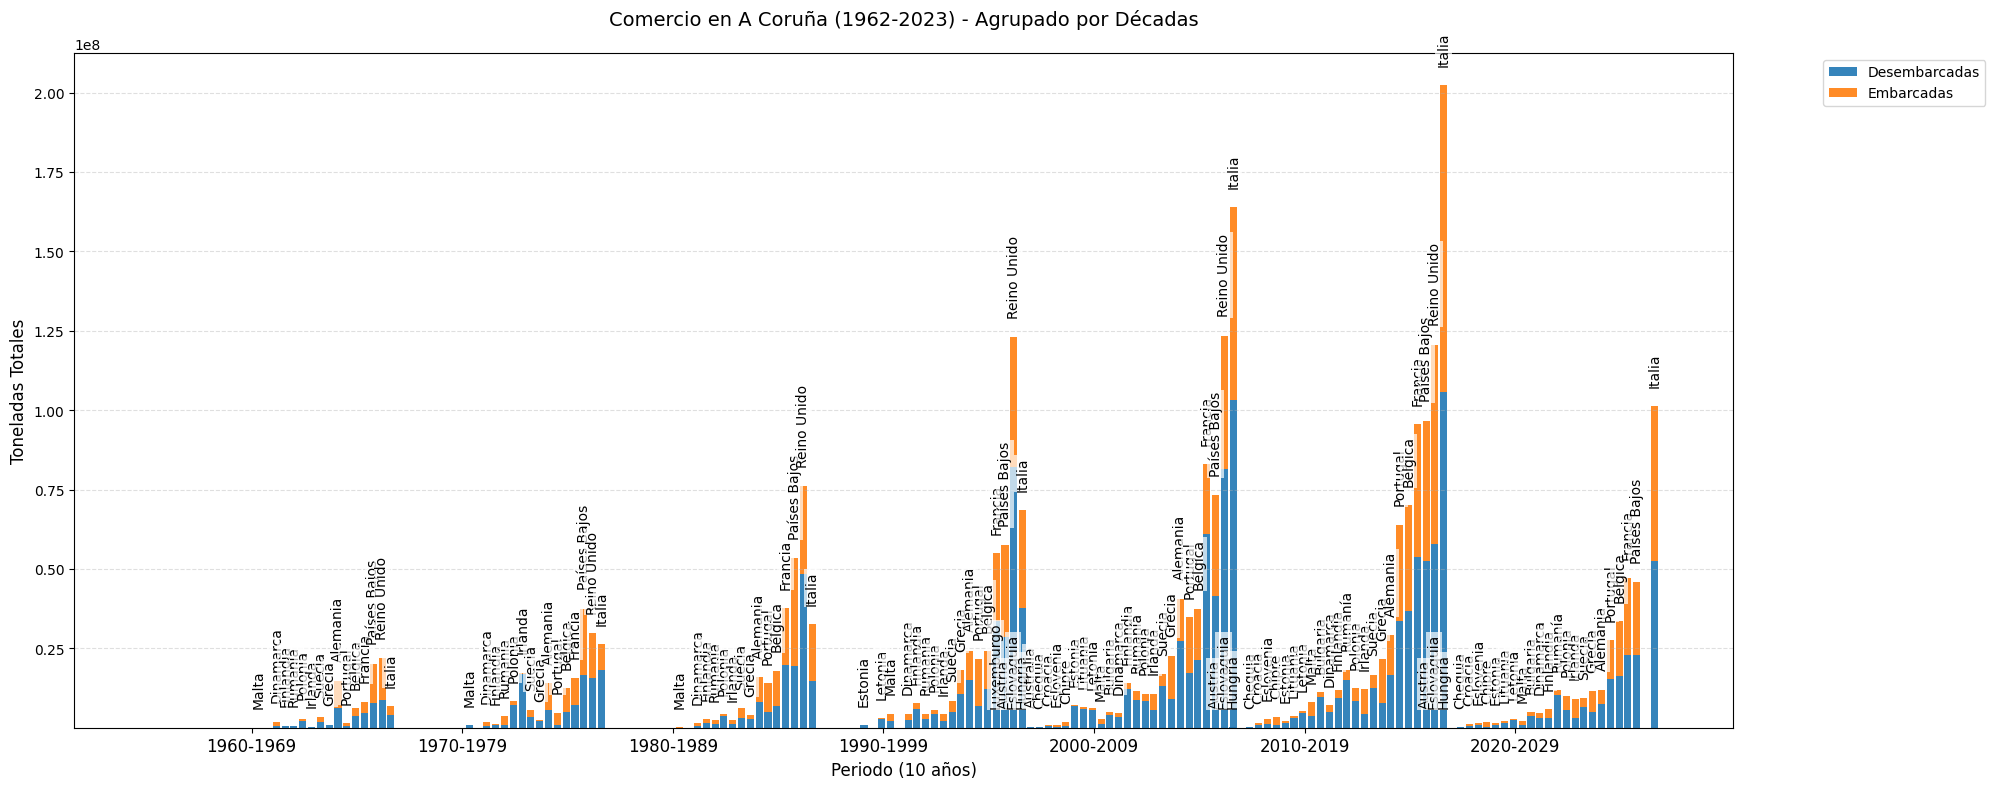

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Filtrar y preparar datos (solo A Coruña)
mercancias_nav_ac['Año'] = pd.to_datetime(mercancias_nav_ac['Año'], format='%Y')

# 2. Definir periodos de 10 años basados en los años presentes
min_year = mercancias_nav_ac['Año'].min().year
max_year = mercancias_nav_ac['Año'].max().year

# Ajustar los bins para múltiplos de 10 (ej: 2010-2019, 2020-2029)
periodo_inicio = min_year - (min_year % 10)  # Ajustar al inicio de la década
periodo_final = max_year + (10 - (max_year % 10)) if (max_year % 10) != 0 else max_year
bins = range(periodo_inicio, periodo_final + 10, 10)
labels = [f"{start}-{start+9}" for start in bins[:-1]]

# Asignar cada año a su periodo de 10 años
mercancias_nav_ac['Periodo'] = pd.cut(
    mercancias_nav_ac['Año'].dt.year,
    bins=bins,
    labels=labels,
    right=False  # [start, end) -> 2020-2029 incluye 2020 pero no 2030
)

# 3. Agrupar y filtrar periodos sin datos
df_grouped = mercancias_nav_ac.groupby(['Periodo', 'País'])[['Embarcadas', 'Desembarcadas']].sum().reset_index()
df_grouped = df_grouped[df_grouped['Embarcadas'] + df_grouped['Desembarcadas'] > 0]  # Eliminar periodos vacíos
df_grouped['Total'] = df_grouped['Embarcadas'] + df_grouped['Desembarcadas']

# 4. Configurar gráfico
fig, ax = plt.subplots(figsize=(20, 8))
bar_width = 0.8  # Columnas más anchas para mejor legibilidad
espacio_entre_grupos = 1.5  # Espacio entre décadas
opacity = 0.9

# Ordenar países por volumen total (para consistencia entre periodos)
paises_ordenados = df_grouped.groupby('País')['Total'].sum().sort_values().index.tolist()
periodos = df_grouped['Periodo'].unique()
n_paises = len(paises_ordenados)

# 5. Dibujar barras para cada periodo
for i, periodo in enumerate(periodos):
    df_periodo = df_grouped[df_grouped['Periodo'] == periodo].sort_values('Total')
    posiciones = np.arange(n_paises) + i * (n_paises * bar_width + espacio_entre_grupos)
    
    # Recolectar datos (rellenar con 0 si no hay datos para un país)
    embarcadas = []
    desembarcadas = []
    for pais in paises_ordenados:
        datos = df_periodo[df_periodo['País'] == pais]
        embarcadas.append(datos['Embarcadas'].sum() if not datos.empty else 0)
        desembarcadas.append(datos['Desembarcadas'].sum() if not datos.empty else 0)
    
    # Dibujar barras apiladas
    ax.bar(posiciones, desembarcadas, bar_width,
          alpha=opacity, color='#1f77b4', label='Desembarcadas' if i == 0 else "")
    ax.bar(posiciones, embarcadas, bar_width,
          bottom=desembarcadas, alpha=opacity, color='#ff7f0e',
          label='Embarcadas' if i == 0 else "")
    
    # Etiquetas de países (encima de las columnas, rotadas verticalmente)
    for pos, pais, total in zip(posiciones, paises_ordenados, np.add(embarcadas, desembarcadas)):
        if total > 0:  # Solo etiquetar si hay datos
            ax.text(pos, total + 0.03 * max(df_grouped['Total']), pais,
                   ha='center', va='bottom', rotation=90, fontsize=10,
                   bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# 6. Ajustar ejes y leyenda
ax.set_xticks([i * (n_paises * bar_width + espacio_entre_grupos) + (n_paises * bar_width / 2) for i in range(len(periodos))])
ax.set_xticklabels(periodos, fontsize=12)
ax.set_xlabel('Periodo (10 años)', fontsize=12)
ax.set_ylabel('Toneladas Totales', fontsize=12)
ax.set_title(f'Comercio en A Coruña ({min_year}-{max_year}) - Agrupado por Décadas', fontsize=14, pad=20)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [15]:
mercancias_nav.set_index('Año')

,Autoridad Portuaria,País,Área Mundial,Embarcadas,Desembarcadas
Año,,,,,
1962,A Coruña,Alemania,Unión Europea,97708.0,472.0
1962,A Coruña,Angola,Sur de África,0.0,0.0
1962,A Coruña,Arabia Saudí,Oriente Medio,0.0,0.0
1962,A Coruña,Argelia,Norte de África,0.0,0.0
1962,A Coruña,Argentina,América del Sur,7.0,0.0
...,...,...,...,...,...
2023,Vilagarcía,Suecia,Unión Europea,0.0,24647.0
2023,Vilagarcía,Tailandia,Resto de Asia,0.0,2591.0
2023,Vilagarcía,Trinidad y Tobago,América Central,0.0,3996.0


In [16]:
mercancias_nav['Embarcadas'] = pd.to_numeric(mercancias_nav['Embarcadas'], errors='coerce').astype('Float64')

mercancias_nav['Desembarcadas'] = pd.to_numeric(mercancias_nav['Desembarcadas'], errors='coerce').astype('Float64')

mercancias_nav

C:\Users\Francisco\AppData\Local\Temp\ipykernel_17800\1038604924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercancias_nav['Embarcadas'] = pd.to_numeric(mercancias_nav['Embarcadas'], errors='coerce').astype('Float64')
C:\Users\Francisco\AppData\Local\Temp\ipykernel_17800\1038604924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercancias_nav['Desembarcadas'] = pd.to_numeric(mercancias_nav['Desembarcadas'], errors='coerce').astype('Float64')


,Año,Autoridad Portuaria,País,Área Mundial,Embarcadas,Desembarcadas
0,1962,A Coruña,Alemania,Unión Europea,97708.0,472.0
1,1962,A Coruña,Angola,Sur de África,0.0,0.0
2,1962,A Coruña,Arabia Saudí,Oriente Medio,0.0,0.0
3,1962,A Coruña,Argelia,Norte de África,0.0,0.0
4,1962,A Coruña,Argentina,América del Sur,7.0,0.0
...,...,...,...,...,...,...
131207,2023,Vilagarcía,Suecia,Unión Europea,0.0,24647.0
131208,2023,Vilagarcía,Tailandia,Resto de Asia,0.0,2591.0
131209,2023,Vilagarcía,Trinidad y Tobago,América Central,0.0,3996.0
131210,2023,Vilagarcía,Turquía,Resto Europa Occidental,0.0,2159.0


In [17]:
# mercancias_nav['Total'] = mercancias_nav['Embarcadas'] + mercancias_nav['Desembarcadas']

In [18]:
mercancias_nav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131212 entries, 0 to 131211
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Año                  131212 non-null  int32  
 1   Autoridad Portuaria  131212 non-null  object 
 2   País                 131212 non-null  object 
 3   Área Mundial         131212 non-null  object 
 4   Embarcadas           131212 non-null  Float64
 5   Desembarcadas        131212 non-null  Float64
dtypes: Float64(2), int32(1), object(3)
memory usage: 5.8+ MB


In [19]:
china_total = mercancias_nav[(mercancias_nav['Autoridad Portuaria'] == 'Barcelona') & (mercancias_nav['País'] == 'China')]

china_total

,Año,Autoridad Portuaria,País,Área Mundial,Embarcadas,Desembarcadas
480,1962,Barcelona,China,Resto de Asia,0.0,0.0
2490,1963,Barcelona,China,Resto de Asia,23.0,5304.0
4500,1964,Barcelona,China,Resto de Asia,1180.0,67.0
6510,1965,Barcelona,China,Resto de Asia,488.0,6159.0
8520,1966,Barcelona,China,Resto de Asia,91.0,9536.0
10530,1967,Barcelona,China,Resto de Asia,17.0,105.0
12772,1969,Barcelona,China,Resto de Asia,610.0,1307.0
14782,1970,Barcelona,China,Resto de Asia,714.0,11.0
17082,1972,Barcelona,China,Resto de Asia,516.0,1638.0
19092,1973,Barcelona,China,Resto de Asia,18452.0,5922.0


In [20]:
eeuu_total = mercancias_nav[(mercancias_nav['Autoridad Portuaria'] == 'Barcelona') & (mercancias_nav['País'] == 'Estados Unidos')]

eeuu_total

,Año,Autoridad Portuaria,País,Área Mundial,Embarcadas,Desembarcadas
488,1962,Barcelona,Estados Unidos,América del Norte,96184.0,408433.0
2498,1963,Barcelona,Estados Unidos,América del Norte,49697.0,591286.0
4508,1964,Barcelona,Estados Unidos,América del Norte,36953.0,474046.0
6518,1965,Barcelona,Estados Unidos,América del Norte,54170.0,414554.0
8528,1966,Barcelona,Estados Unidos,América del Norte,32904.0,423051.0
...,...,...,...,...,...,...
118519,2019,Barcelona,Estados Unidos,América del Norte,1174191.0,3762222.0
121211,2020,Barcelona,Estados Unidos,América del Norte,1431117.5,2100149.4
123832,2021,Barcelona,Estados Unidos,América del Norte,1454856.0,2031568.0
126544,2022,Barcelona,Estados Unidos,América del Norte,1843605.0,2145355.0


In [21]:
embarcadas_eeuu_df = eeuu_total.pivot_table(
    index='Año',
    columns='País',
    values='Embarcadas',
    aggfunc='sum'  # Por si hay duplicados
).reset_index()

desembarcadas_eeuu_df = eeuu_total.pivot_table(
    index='Año',
    columns='País',
    values='Desembarcadas',
    aggfunc='sum'  # Por si hay duplicados
).reset_index()

embarcadas_china_df = china_total.pivot_table(
    index='Año',
    columns='País',
    values='Embarcadas',
    aggfunc='sum'  # Por si hay duplicados
).reset_index()

desembarcadas_china_df = china_total.pivot_table(
    index='Año',
    columns='País',
    values='Desembarcadas',
    aggfunc='sum'  # Por si hay duplicados
).reset_index()

print(embarcadas_eeuu_df)

País   Año  Estados Unidos
0     1962         96184.0
1     1963         49697.0
2     1964         36953.0
3     1965         54170.0
4     1966         32904.0
..     ...             ...
57    2019       1174191.0
58    2020       1431117.5
59    2021       1454856.0
60    2022       1843605.0
61    2023       1415819.0

[62 rows x 2 columns]


C:\Users\Francisco\AppData\Local\Temp\ipykernel_17800\3432974325.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.lineplot(
C:\Users\Francisco\AppData\Local\Temp\ipykernel_17800\3432974325.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.lineplot(
C:\Users\Francisco\AppData\Local\Temp\ipykernel_17800\3432974325.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.lineplot(
C:\Users\Francisco\AppData\Local\Temp\ipykernel_17800\3432974325.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.lineplot(


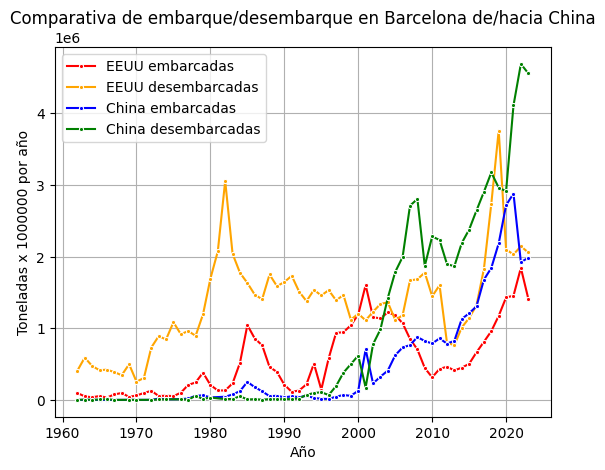

In [22]:
import seaborn as sns

sns.lineplot(
    data=embarcadas_eeuu_df,
    x='Año',
    y='Estados Unidos',
    marker='.',
    color='red',
    ci=True,  # Sin intervalos de confianza
    label='EEUU embarcadas'
)
sns.lineplot(
    data=desembarcadas_eeuu_df,
    x='Año',
    y='Estados Unidos',
    marker='.',
    color='orange',
    ci=True,  # Sin intervalos de confianza
    label= 'EEUU desembarcadas'
)

sns.lineplot(
    data=embarcadas_china_df,
    x='Año',
    y='China',
    marker='.',
    color='blue',
    ci=True,  # Sin intervalos de confianza
    label= 'China embarcadas'
)
sns.lineplot(
    data=desembarcadas_china_df,
    x='Año',
    y='China',
    marker='.',
    color='green',
    ci=True,  # Sin intervalos de confianza
    label= 'China desembarcadas'
)

plt.ylabel("Toneladas x 1000000 por año")
plt.title('Comparativa de embarque/desembarque en Barcelona de/hacia China')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import seaborn as sns



<Figure size 1000x600 with 0 Axes>

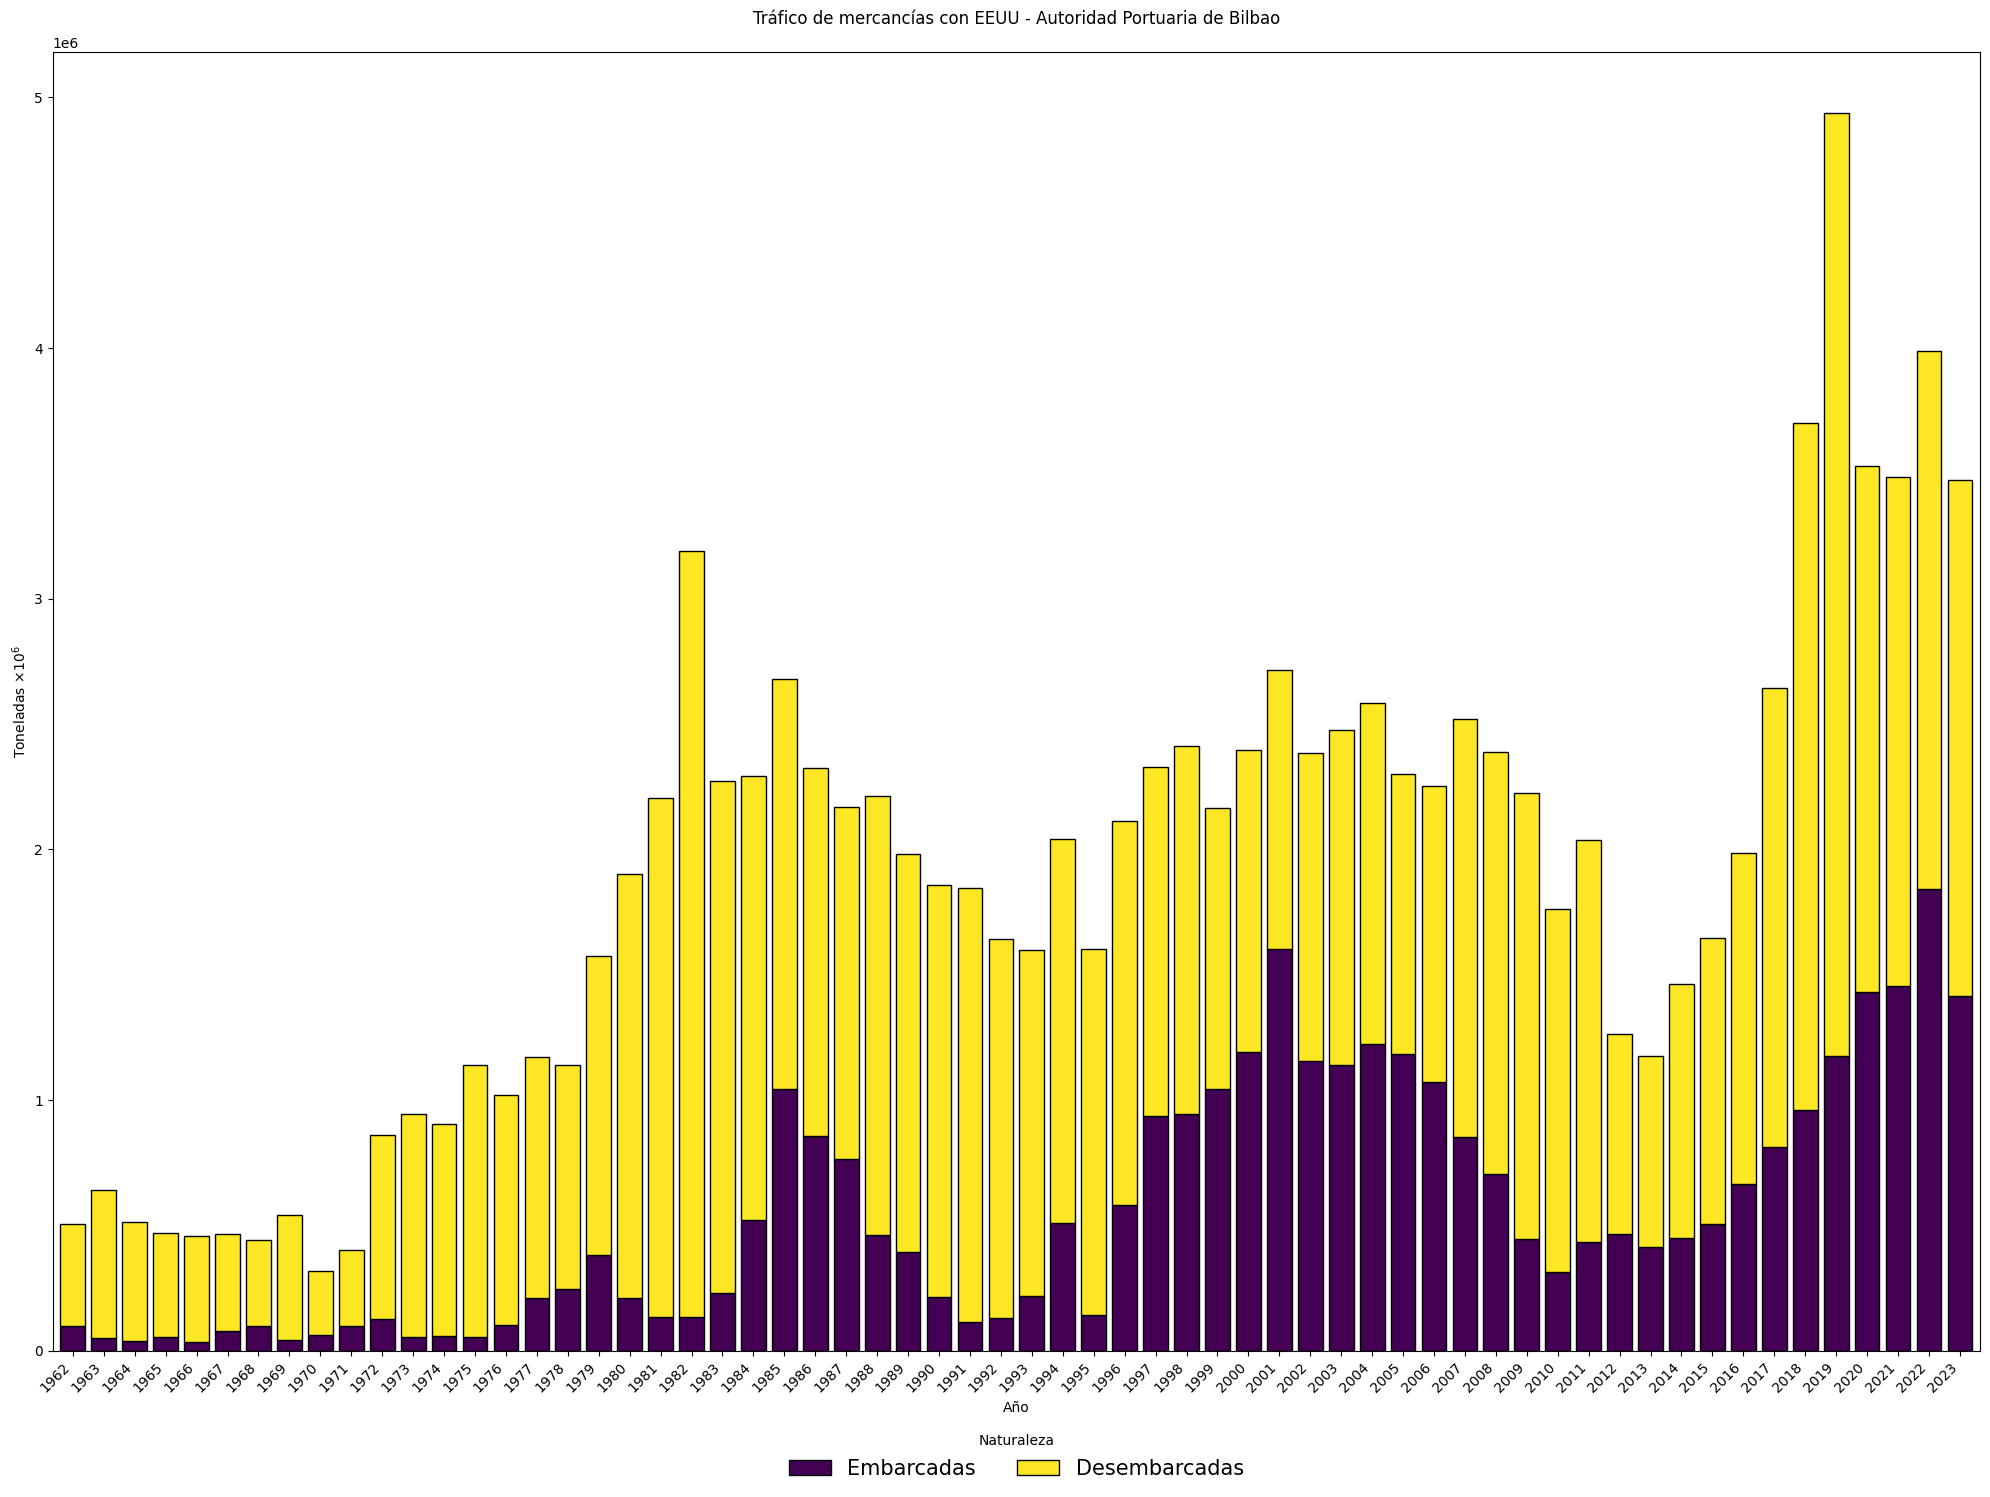

In [24]:
df_melted = eeuu_total.set_index('Año')

# 2. Crear el gráfico apilado
plt.figure(figsize=(10, 6))

# Gráfico de barras apiladas
df_melted.plot(
    figsize=(20,15),
    kind='bar',
    stacked=True,
    colormap='viridis',  # Paleta de colores
    edgecolor='black',
    width=0.8  # Ancho de las barras
)

# Personalización
plt.title("Tráfico de mercancías con EEUU - Autoridad Portuaria de Bilbao", pad=20)
plt.ylabel(r"Toneladas $\times 10^6$")
plt.xlabel("Año")
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje X

# Leyenda compacta y abajo
plt.legend(
    title="Naturaleza",
    bbox_to_anchor=(0.5, -0.05),
    loc='upper center',
    ncol=4,
    fontsize='15',
    frameon=False
)

# Ajustar márgenes para que quepan las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()